In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.site_models import (
    ScheduledDowntimeData,
    UnscheduledDowntimeData,
    SeeingData,
    SeeingModel,
    CloudData,
    Almanac,
)
from astropy.time import Time
from rubin_sim.utils import (
    _ra_dec2_hpid,
    Site,
    calc_lmst_last,
    m5_flat_sed,
    _approx_ra_dec2_alt_az,
    _angular_separation,
    _approx_altaz2pa,
    survey_start_mjd,
)
from astropy import units as u

In [11]:
mjd_start = survey_start_mjd()
mjd_start_time = Time(mjd_start, format="mjd")

cloud_limit=0.3
almanac = Almanac(mjd_start=mjd_start)

mjds = np.arange(mjd_start, mjd_start+365.25, 1/24/60.*40)

sun_moon_info = almanac.get_sun_moon_positions(mjds)
good = np.where(sun_moon_info['sun_alt'] < np.radians(-18.))[0]


times = Time(mjds[good], format='mjd')



In [12]:
clouded_fracs = []

offsets = np.arange(0, 160, 1)

for cloud_offset_year in offsets:

    cloud_data = CloudData(
                    mjd_start_time, cloud_db=None, offset_year=cloud_offset_year,
                )
    

    bulk_cloud = cloud_data(times)
    
    clouded_fracs.append(np.where(bulk_cloud > cloud_limit)[0].size/bulk_cloud.size)
    
    

Text(0, 0.5, 'Cloudy fraction')

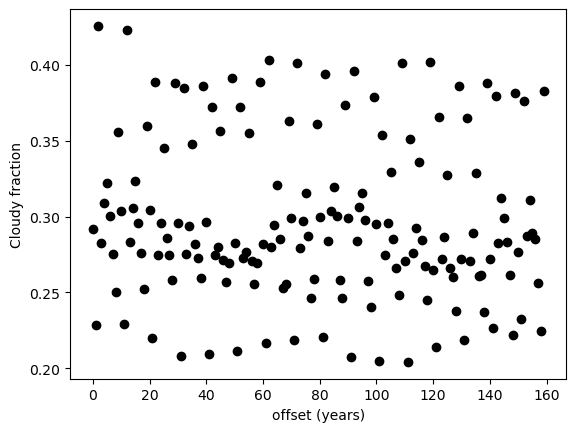

In [13]:
plt.plot(offsets , clouded_fracs, 'ko')
plt.xlabel('offset (years)')
plt.ylabel('Cloudy fraction')

Text(0, 0.5, 'Cloudy fraction')

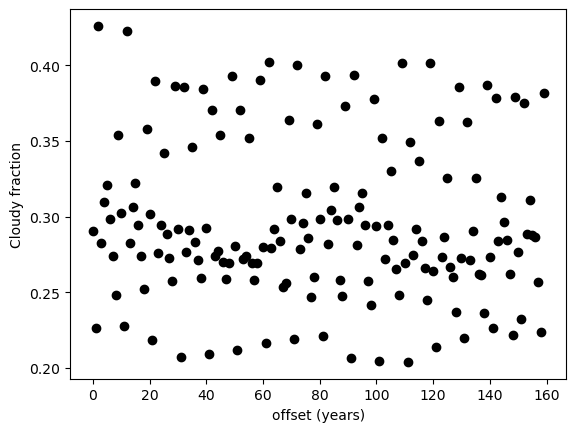

In [7]:
plt.plot(offsets , clouded_fracs, 'ko')
plt.xlabel('offset (years)')
plt.ylabel('Cloudy fraction')

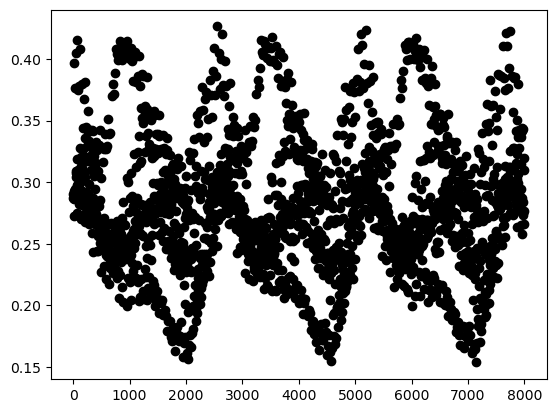

In [10]:
plt.plot(offsets , clouded_fracs, 'ko')

In [5]:
#plt.plot(offsets % 1200, clouded_fracs, 'ko')

In [5]:
cloud_data.time_range/3600/24/365.25

19.984342250361244

In [6]:
cloud_data(times[440:450])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
cloud_data(times[440:450] + cloud_data.time_range*3*u.second)

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 10 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.where(bulk_cloud > 0)

(array([    0,     1,     2, ..., 17320, 17321, 17322]),)

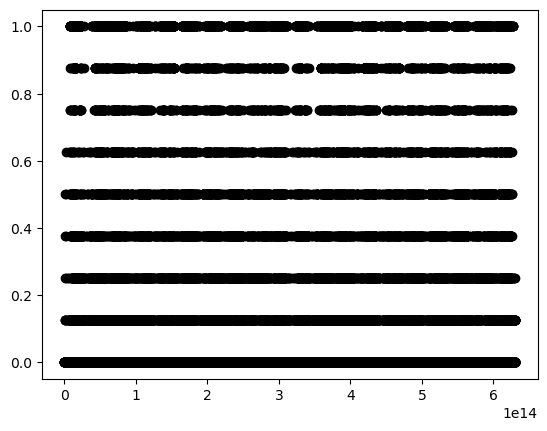

In [9]:
plt.plot(cloud_data.cloud_dates, cloud_data.cloud_values, 'ko')

In [ ]:
offsets

In [13]:
cloud_data.time_range

630657879.0

(0.0, 1.0)

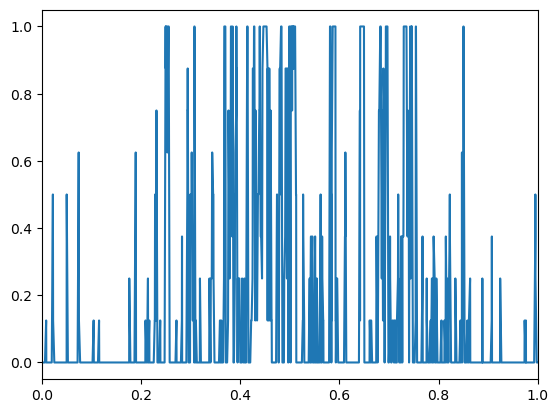

In [12]:
plt.plot(cloud_data.cloud_dates/3600/24/365/1e6, cloud_data.cloud_values)
plt.xlim([0,1])


In [13]:
x = cloud_data.cloud_dates/3600/24/365/1e6

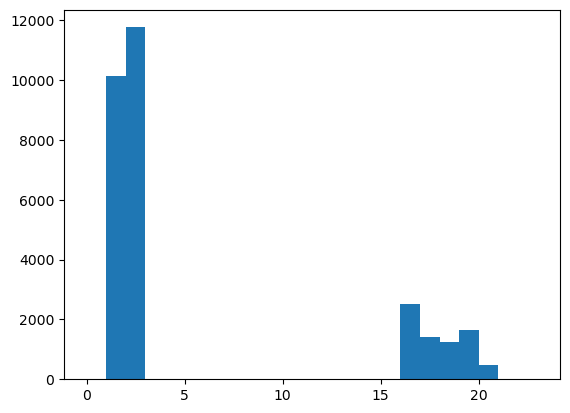

In [29]:
_ack = plt.hist(np.diff(x*365*24), bins=np.arange(24))

In [30]:
# ok, so are we sure we're not sometimes getting stuck interpolating to values on the log edges a bunch?

In [40]:
x[1000:1020]*365*24

array([5983.9775    , 6001.3675    , 6003.56416667, 6005.76111111,
       6007.95777778, 6025.37583333, 6027.56305556, 6029.75055556,
       6031.93777778, 6049.38416667, 6051.56194444, 6053.74      ,
       6055.91777778, 6073.39277778, 6075.56111111, 6077.72944444,
       6079.89777778, 6097.40111111, 6099.56      , 6101.71861111])